### `By : Mohamed Ahmed Saad Abohassan`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
df=pd.read_csv("data_clean.csv")

In [3]:
df

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,3.735304,4.568506,0.000000,4.568506,0.166667,0.000000,0.083333,1.098612,6.908755,5.312231,4.945277
1,8.071989,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.853808,8.319725,6.978531
2,7.822504,6.651791,6.651791,0.000000,1.000000,0.606135,0.000000,2.564949,8.922792,6.434654,6.442994
3,6.707735,2.833213,2.833213,0.000000,0.083333,0.080042,0.000000,0.693147,7.090910,6.521114,5.504483
4,7.501540,7.196147,0.000000,7.099506,0.666667,0.000000,0.583333,2.197225,7.496097,7.244983,7.501632
...,...,...,...,...,...,...,...,...,...,...,...
8631,1.927413,3.086487,3.086487,0.000000,0.166667,0.154151,0.000000,0.693147,6.216606,4.088408,3.794898
8632,3.384170,5.677165,0.000000,5.677165,1.000000,0.000000,0.833333,1.945910,6.908755,5.788719,3.909748
8633,3.194529,4.979489,0.000000,4.979489,0.833333,0.000000,0.666667,1.791759,6.908755,4.410016,4.423869
8634,2.671218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.216606,3.980615,4.038755


PCA components : 
  [[-7.57462879e-03  5.34736426e-01  2.74461962e-01 -3.14257432e-01
   8.50825746e-02]
 [ 4.12008352e-01 -4.35386577e-02 -1.35540774e-01 -8.11181935e-02
   4.40896462e-02]
 [ 2.82398838e-01  2.31454182e-01 -5.02927570e-01 -1.69098589e-01
   3.87871904e-02]
 [ 3.62223838e-01 -1.86312626e-01  3.41127069e-01  6.71589691e-02
  -5.74540943e-03]
 [ 4.17341295e-01 -1.28432806e-01  1.29336108e-01 -6.62212240e-02
   3.26586899e-02]
 [ 2.97668530e-01  2.19558437e-01 -4.56250226e-01 -1.29823992e-01
   4.96277365e-03]
 [ 3.49164352e-01 -2.01925567e-01  4.00636051e-01  1.93716720e-02
   4.71253178e-03]
 [ 4.41032854e-01 -5.23415251e-02  4.24478691e-03 -8.44827433e-02
   3.93309307e-02]
 [ 1.24279070e-01  3.42046989e-01  8.30225244e-03  7.59786822e-01
   5.36871371e-01]
 [ 1.56795102e-01  4.02386097e-01  9.66797668e-02  3.63969399e-01
  -8.12229641e-01]
 [ 7.11037537e-04  4.86572431e-01  3.77041439e-01 -3.50792805e-01
   1.96650439e-01]]
explained_variance : 
  [0.44236171 0.675424

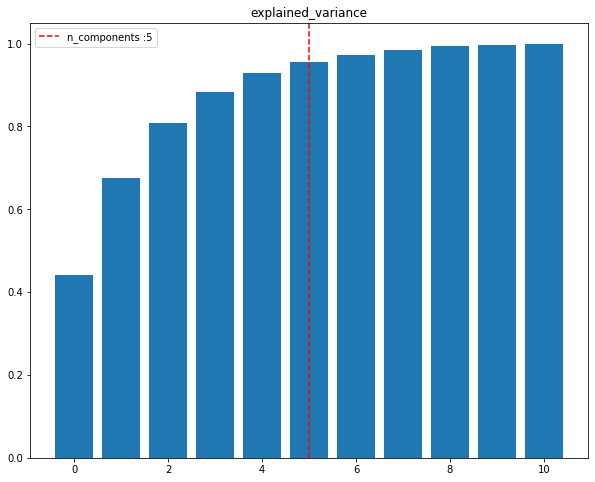

In [4]:
import numpy as np

class PCA ():

    def __init__(self,n_components = 0.95):
        self.n_components = n_components
        if self.n_components > 1:
            self.type = 'var'
        else:
            self.type = 'ratio'

    def fit(self,X):

        self.mean = X.mean(axis=0)
        self.std = X.std(axis=0)

        X =(X-self.mean)/self.std 
        C= (X.T@X)/(X.shape[0]-1)
        Eigenvalues , Eigenvectors  = np.linalg.eig(C)
        if self.type=='var':
                self.components = Eigenvectors[:,0:self.n_components]
                self.normalize_Eigenvalues = Eigenvalues/sum(Eigenvalues)
                self.ratios=np.cumsum(self.normalize_Eigenvalues)


        if self.type=='ratio':
            self.normalize_Eigenvalues = Eigenvalues/sum(Eigenvalues)
            self.ratios=np.cumsum(self.normalize_Eigenvalues)
            self.n_components=np.where(self.ratios>=self.n_components)[0][0]
            self.components = Eigenvectors[:,0:self.n_components]
            
        X_new= X @ self.components
        return X_new

    def transform(self,Z):
        Z_new = (Z - self.mean )/ self.std
        Z_new = Z_new @ self.components
        
        return Z_new

    #optional 
    def plot_explained_variance(self):
        rang=np.arange(len(self.ratios))
        if self.type == 'ratio':
            
            plt.figure(figsize=(10,8))
            plt.bar(rang,self.ratios)
            plt.axvline(x = self.n_components, color = 'r', linestyle = '--',label=f"n_components :{self.n_components}")
            plt.legend()
            plt.title("explained_variance")

        
        if self.type=='var':
            plt.figure(figsize=(10,8))
            plt.bar(rang,self.ratios)
            plt.axhline(y = self.ratios[self.n_components], color = 'r', linestyle = '--',label=f"variance:{(self.ratios[self.n_components]):0.4f}")
            plt.legend()
            plt.title("explained_variance")

        
mean = df.mean(axis=0)
std = df.std(axis=0)
X =(df-mean)/std 
pca_section = PCA(n_components=0.95)
X_transofmed = pca_section.fit(X)
pca_section.plot_explained_variance()
print("PCA components : \n ",pca_section.components) 
print("explained_variance : \n ",pca_section.ratios) 


In [5]:
X_transofmed

,0,1,2,3,4
0,-1.647186,-2.374624,-0.226623,-0.483116,-0.064936
1,-2.746808,2.246366,0.986426,1.078552,-0.604503
2,1.327023,1.862119,-1.807786,-0.541631,1.123123
3,-2.177055,-0.044269,-0.655722,-0.806697,-0.626574
4,0.723819,0.201169,2.247172,-0.902885,-0.387382
...,...,...,...,...,...
8631,-2.396415,-3.418698,-2.387584,-1.163063,0.128433
8632,0.526302,-3.536794,0.495818,-0.081578,-0.518411
8633,-0.230814,-3.677809,0.257841,-0.656171,0.588094
8634,-3.767511,-3.398178,-1.274107,-0.982608,0.165889


array([0.44236171, 0.67542414, 0.80743782, 0.88235925, 0.92928289,
       0.95667212, 0.97138426, 0.98373322, 0.9936422 , 0.99635932,
       1.        ])

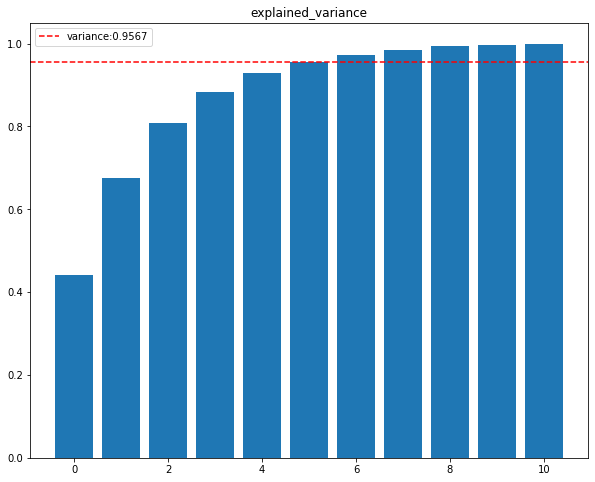

In [6]:
pca_section = PCA(n_components=5)
X_transofmed = pca_section.fit(X)
pca_section.plot_explained_variance()
pca_section.components 
pca_section.ratios 

In [7]:
X_transofmed

,0,1,2,3,4
0,-1.647186,-2.374624,-0.226623,-0.483116,-0.064936
1,-2.746808,2.246366,0.986426,1.078552,-0.604503
2,1.327023,1.862119,-1.807786,-0.541631,1.123123
3,-2.177055,-0.044269,-0.655722,-0.806697,-0.626574
4,0.723819,0.201169,2.247172,-0.902885,-0.387382
...,...,...,...,...,...
8631,-2.396415,-3.418698,-2.387584,-1.163063,0.128433
8632,0.526302,-3.536794,0.495818,-0.081578,-0.518411
8633,-0.230814,-3.677809,0.257841,-0.656171,0.588094
8634,-3.767511,-3.398178,-1.274107,-0.982608,0.165889


In [8]:
pca_section.transform(X)

,0,1,2,3,4
0,-1.647186,-2.374624,-0.226623,-0.483116,-0.064936
1,-2.746808,2.246366,0.986426,1.078552,-0.604503
2,1.327023,1.862119,-1.807786,-0.541631,1.123123
3,-2.177055,-0.044269,-0.655722,-0.806697,-0.626574
4,0.723819,0.201169,2.247172,-0.902885,-0.387382
...,...,...,...,...,...
8631,-2.396415,-3.418698,-2.387584,-1.163063,0.128433
8632,0.526302,-3.536794,0.495818,-0.081578,-0.518411
8633,-0.230814,-3.677809,0.257841,-0.656171,0.588094
8634,-3.767511,-3.398178,-1.274107,-0.982608,0.165889
